In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# slowdown data
slowdown_data_DeepRM_normal = pd.read_csv('../Experiment1_DeepRm_NoAnomalies/data/slow_down_lr_curve.csv')
slowdown_data_DeepRM_anom = pd.read_csv('../Experiment6_DeepRM_Anomalies/data/slow_down_lr_curve.csv')

slowdown_data_DeepRMcloud_anom_lowpenalty = pd.read_csv('../Experiment4_DeepRmCloud_verylowpenalty/data/slow_down_lr_curve.csv')
slowdown_data_DeepRMcloud_anom_costefficient = pd.read_csv('../Experiment5_DeepRmCloud_CostEfficient/data/slow_down_lr_curve.csv')
#not executed data

all_avg_not_exec_DeepRM_normal = pd.read_csv('../Experiment1_DeepRm_NoAnomalies/data/all_avg_not_exec.csv')
all_avg_not_exec_DeepRM_anom = pd.read_csv('../Experiment6_DeepRM_Anomalies/data/all_avg_not_exec.csv')

all_avg_not_exec_DeepRMcloud_anom_lowpenalty = pd.read_csv('../Experiment4_DeepRmCloud_verylowpenalty/data/all_avg_not_exec.csv')
all_avg_not_exec_DeepRMcloud_anom_costefficient = pd.read_csv('../Experiment5_DeepRmCloud_CostEfficient/data/all_avg_not_exec.csv')

#cost data

all_avg_cost_DeepRMcloud_anom_lowpenalty = pd.read_csv('../Experiment4_DeepRmCloud_verylowpenalty/data/cost_data.csv')
all_avg_cost_DeepRMcloud_anom_costeff = pd.read_csv('../Experiment5_DeepRmCloud_CostEfficient/data/cost_data.csv')



# reward data
# slowdown data
reward_data_DeepRM_normal = pd.read_csv('../Experiment1_DeepRm_NoAnomalies/data/mean_rew_lr_curve.csv')
reward_data_DeepRM_anom = pd.read_csv('../Experiment6_DeepRM_Anomalies/data/mean_rew_lr_curve.csv')

reward_data_DeepRMcloud_anom_lowpenalty = pd.read_csv('../Experiment4_DeepRmCloud_verylowpenalty/data/mean_rew_lr_curve.csv')
reward_data_DeepRMcloud_anom_costefficient = pd.read_csv('../Experiment5_DeepRmCloud_CostEfficient/data/mean_rew_lr_curve.csv')









In [2]:
#concat data

combined_data_slowdown = pd.concat(
    [slowdown_data_DeepRM_normal.rename(columns={"slow_down_lr_curve": "deeprm_normal"}), 
     slowdown_data_DeepRM_anom.rename(columns={"slow_down_lr_curve": "deeprm_anomalies"}),
     slowdown_data_DeepRMcloud_anom_lowpenalty.rename(columns={"slow_down_lr_curve": "deeprm_cloud_anomalies_lowpen"}),
     slowdown_data_DeepRMcloud_anom_costefficient.rename(columns={"slow_down_lr_curve": "deeprm_cloud_anomalies_costeff"})
    
    ], 
    axis=1
)

combined_data_notexe = pd.concat(
    [all_avg_not_exec_DeepRM_normal.rename(columns={"all_avg_not_exe": "deeprm_normal"}), 
     all_avg_not_exec_DeepRM_anom.rename(columns={"all_avg_not_exe": "deeprm_anomalies"}),
     all_avg_not_exec_DeepRMcloud_anom_lowpenalty.rename(columns={"all_avg_not_exe": "deeprm_cloud_anomalies_lowpen"}),
     all_avg_not_exec_DeepRMcloud_anom_costefficient.rename(columns={"all_avg_not_exe": "deeprm_cloud_anomalies_costeff"}),

    ], 
    axis=1
)

combined_data_cost = pd.concat(
    [all_avg_cost_DeepRMcloud_anom_lowpenalty.rename(columns={"cost_data": "low_pen"}), 
     all_avg_cost_DeepRMcloud_anom_costeff.rename(columns={"cost_data": "costeff"})],
    axis=1
)

combined_data_rew = pd.concat(
    [reward_data_DeepRM_normal.rename(columns={"mean_rew_lr_curve": "deeprm_normal_rew"}), 
     reward_data_DeepRM_anom.rename(columns={"mean_rew_lr_curve": "deeprm_anomalies_rew"}),
     reward_data_DeepRMcloud_anom_lowpenalty.rename(columns={"mean_rew_lr_curve": "deeprm_cloud_anomalies_lowpen_rew"}),
     reward_data_DeepRMcloud_anom_costefficient.rename(columns={"mean_rew_lr_curve": "deeprm_cloud_anomalies_costeff_rew"})
    
    ], 
    axis=1
)



In [3]:

# # Save each combined dataframe to a CSV file


# combined_data_slowdown.to_csv('combined_data_slowdown.csv', index=False)
# combined_data_notexe.to_csv('combined_data_notexe.csv', index=False)
# combined_data_cost.to_csv('combined_data_cost.csv', index=False)
# combined_data_rew.to_csv('combined_data_rew.csv', index=False)

## Slowdown 

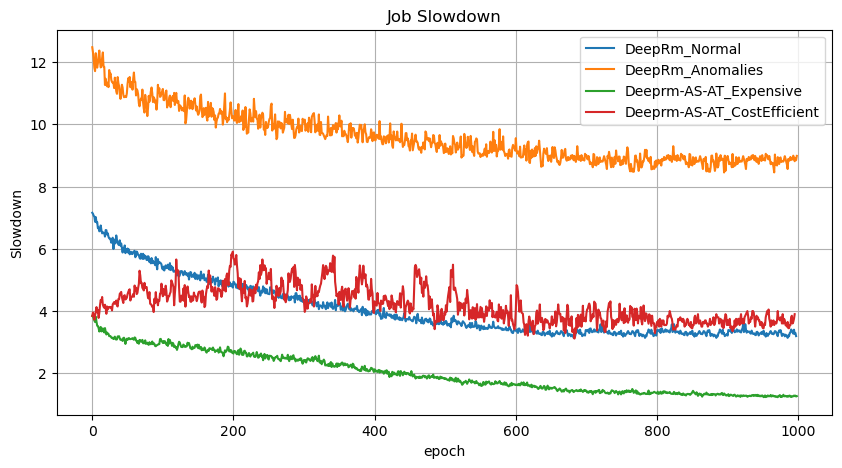

In [4]:

# Plotting the data
plt.figure(figsize=(10, 5))

plt.plot(combined_data_slowdown.index, combined_data_slowdown['deeprm_normal'], label='DeepRm_Normal')
plt.plot(combined_data_slowdown.index, combined_data_slowdown['deeprm_anomalies'], label='DeepRm_Anomalies')
plt.plot(combined_data_slowdown.index, combined_data_slowdown['deeprm_cloud_anomalies_lowpen'], label='Deeprm-AS-AT_Expensive')
plt.plot(combined_data_slowdown.index, combined_data_slowdown['deeprm_cloud_anomalies_costeff'], label='Deeprm-AS-AT_CostEfficient')

# Adding titles and labels
plt.title('Job Slowdown')
plt.xlabel('epoch')
plt.ylabel('Slowdown')
plt.legend()

# Show the plot
plt.grid(True)
plt.savefig('job_slowdown_plot.png')  # Save the plot as a PNG file
plt.show()

## Not Executed

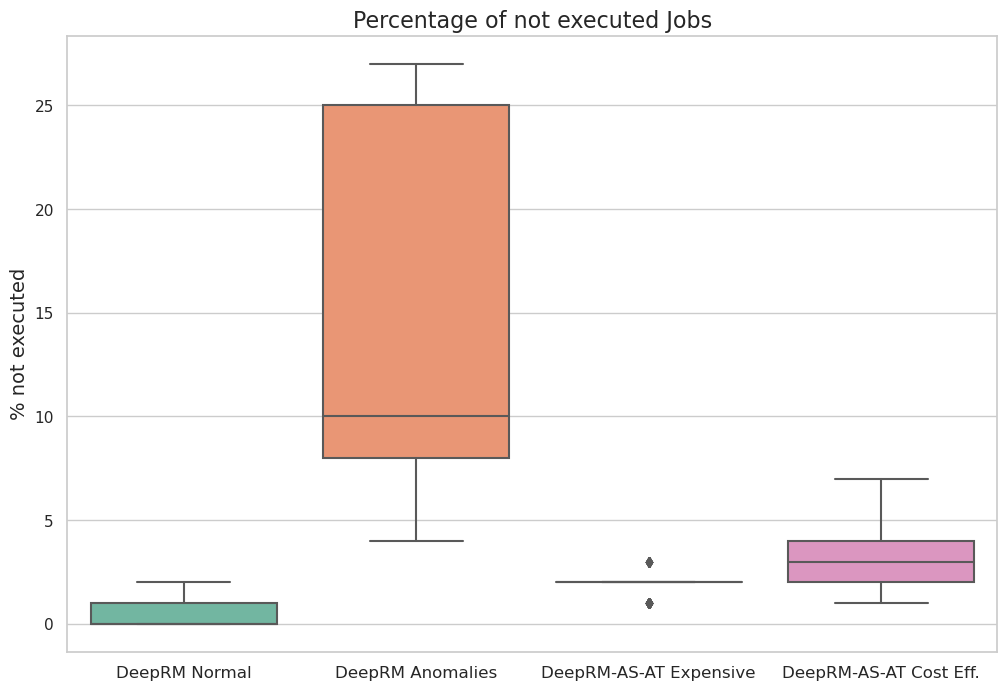

In [5]:
data = combined_data_notexe

sns.set(style="whitegrid")

# Increase figure size
plt.figure(figsize=(12, 8))

# Create the boxplot with seaborn for better aesthetics
boxplot = sns.boxplot(data=combined_data_notexe[['deeprm_normal', 'deeprm_anomalies', 'deeprm_cloud_anomalies_lowpen', 'all_avg_not_exec']],
                      palette="Set2")

# Customize the title and labels
plt.title('Percentage of not executed Jobs', fontsize=16)
plt.ylabel('% not executed', fontsize=14)

# Customize tick labels
boxplot.set_xticklabels(['DeepRM Normal', 'DeepRM Anomalies', 'DeepRM-AS-AT Expensive','DeepRM-AS-AT Cost Eff.'], fontsize=12)

plt.savefig('anomaly_tolerance_plot.png')  # Save the plot as a PNG file

# Show the plot
plt.show()

In [11]:
variance = combined_data_notexe[['deeprm_normal', 'deeprm_anomalies', 'deeprm_cloud_anomalies_lowpen', 'all_avg_not_exec']].var()

print("Variance for each column:")
print(variance)

Variance for each column:
deeprm_normal                     0.240163
deeprm_anomalies                 74.651870
deeprm_cloud_anomalies_lowpen     0.050259
all_avg_not_exec                  1.384808
dtype: float64


In [8]:
combined_data_notexe["deeprm_anomalies"]

0      27
1      10
2      27
3      27
4       5
       ..
994    27
995    10
996     5
997    21
998    21
Name: deeprm_anomalies, Length: 999, dtype: int64

## COST

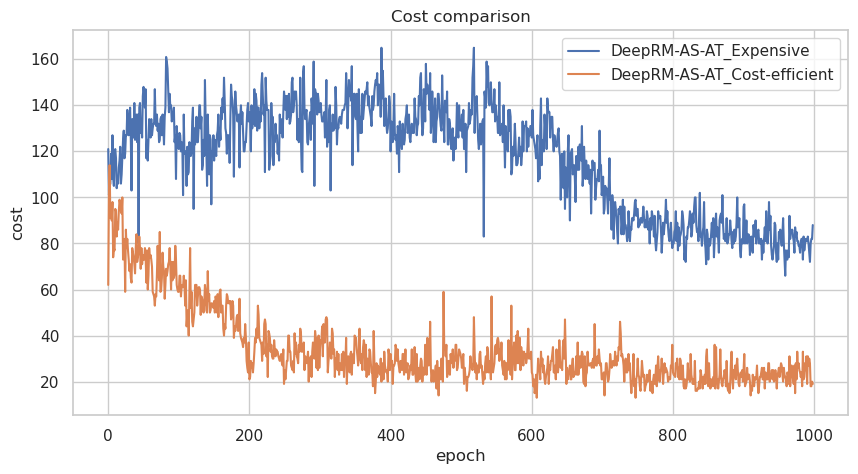

In [6]:
# Plotting the data
plt.figure(figsize=(10, 5))
plt.plot(combined_data_cost.index, combined_data_cost['low_pen'], label='DeepRM-AS-AT_Expensive')
plt.plot(combined_data_cost.index, combined_data_cost['costeff'], label='DeepRM-AS-AT_Cost-efficient')


# Adding titles and labels
plt.title('Cost comparison')
plt.xlabel('epoch')
plt.ylabel('cost')
plt.legend()


# Show the plot

plt.savefig('cost_plot.png')  # Save the plot as a PNG file


plt.grid(True)
plt.show()

## Rewards

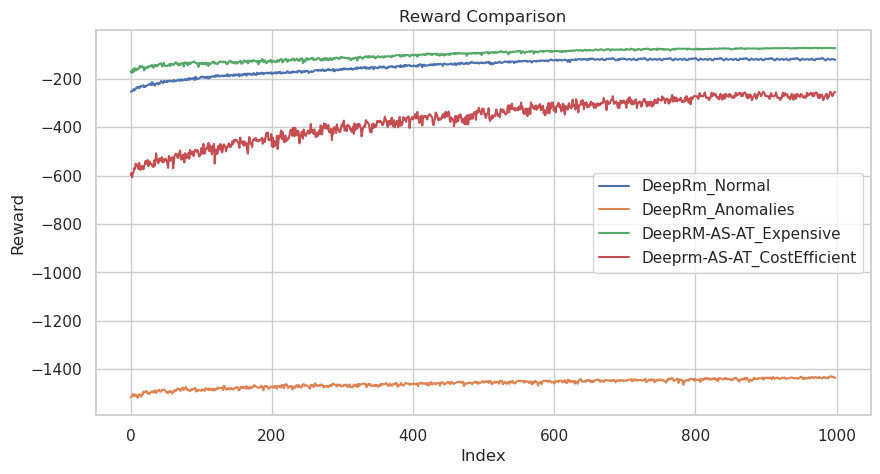

In [52]:
# Plotting the data
plt.figure(figsize=(10, 5))

# Plot each reward curve
plt.plot(combined_data_rew.index, combined_data_rew['deeprm_normal_rew'], label='DeepRm_Normal')
plt.plot(combined_data_rew.index, combined_data_rew['deeprm_anomalies_rew'], label='DeepRm_Anomalies')
plt.plot(combined_data_rew.index, combined_data_rew['deeprm_cloud_anomalies_lowpen_rew'], label='DeepRM-AS-AT_Expensive')
plt.plot(combined_data_rew.index, combined_data_rew['deeprm_cloud_anomalies_costeff_rew'], label='Deeprm-AS-AT_CostEfficient')

# Adding titles and labels
plt.title('Reward Comparison')
plt.xlabel('Index')
plt.ylabel('Reward')
plt.legend()
plt.grid(True)

plt.savefig('reward_plot.png')  # Save the plot as a PNG file

# Show the plot
plt.show()